In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import pandas as pd 
import json

In [2]:
tweets_file = open("discount_data.txt", "r")

In [3]:
tweets_data = []
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [4]:
len(tweets_data)

307589

In [5]:
tweets_data[38176]

{'limit': {'track': 5, 'timestamp_ms': '1544121146334'}}

In [6]:
temp = list(filter(lambda x: 'limit' not in x.keys(),tweets_data))

In [7]:
len(temp)

307584

In [16]:
temp1 = list(filter(lambda x: 'deal' not in x['text'],temp))

In [17]:
len(temp1)

224019

In [21]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], temp))

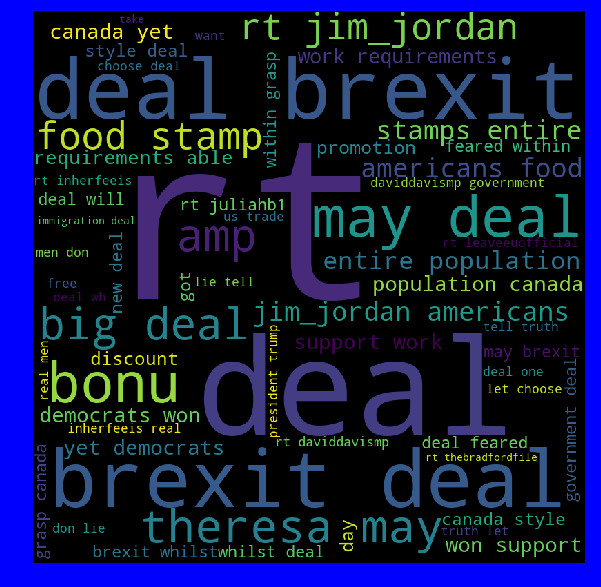

In [34]:
comment_words = ' '
stopwords = set(STOPWORDS) 
stopwords.update(['co', 'https'])

#iterate through the CONTENT column
for val in tweets.iloc[:10000]['text']: 
    for words in str(val).split(): 
        comment_words = comment_words + words.lower() + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 15).generate(comment_words) 
  
# plot wordcloud image                      
plt.figure(figsize = (8, 8), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

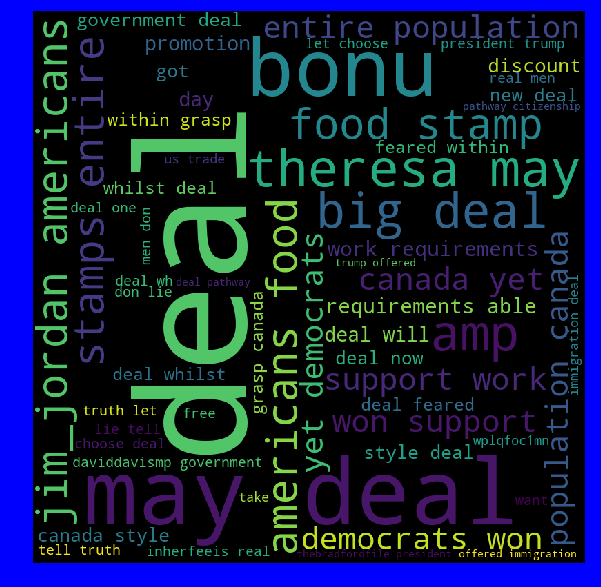

In [36]:
comment_words = ' '
stopwords = set(STOPWORDS) 
stopwords.update(['co', 'https', 'rt', 'brexit'])

#iterate through the CONTENT column
for val in tweets.iloc[:10000]['text']: 
    for words in str(val).split(): 
        comment_words = comment_words + words.lower() + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 15).generate(comment_words) 
  
# plot wordcloud image                      
plt.figure(figsize = (8, 8), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

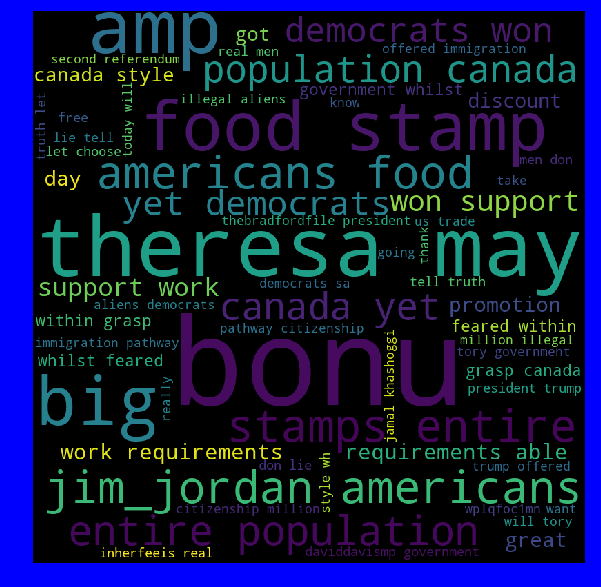

In [37]:
comment_words = ' '
stopwords = set(STOPWORDS) 
stopwords.update(['co', 'https', 'rt', 'brexit', 'deal'])

#iterate through the CONTENT column
for val in tweets.iloc[:10000]['text']: 
    for words in str(val).split(): 
        comment_words = comment_words + words.lower() + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 15).generate(comment_words) 
  
# plot wordcloud image                      
plt.figure(figsize = (8, 8), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [53]:
retweets = {}
for retweet in temp:
    if 'retweeted_status' not in retweet:
        continue
    rt = retweet['retweeted_status']
    if rt['retweet_count'] < 1000:
        continue
    retweets[rt['id_str']] = rt
    # convert to list
retweets = [retweets[w] for w in retweets.keys()]
    # sort by retweet count
retweets.sort(key=lambda x: -x['retweet_count'])

In [54]:
for t in retweets[:10]:
    print ('['+ t['user']['screen_name'] + ']: ' + t['text'] + \
    ' [' + str(t['retweet_count']) + ' retweets]'+'\n')

[xmaribelc]: You can go to the gym, drink your water and take your vitamins, but if you don’t deal with the shit going on in you… https://t.co/fpbzMG2qGn [87042 retweets]

[FallonTonight]: Want more?! @bts_twt gives an incredible bonus performance of “I’m Fine” https://t.co/P6qPrcR22c #BTSonFallon https://t.co/GzNcxHTVvz [79195 retweets]

[Pastabowl2]: When your partner falls asleep in an awkward position but you love them so much you just deal with it. https://t.co/1Hq0UjUwP4 [72911 retweets]

[808kill]: How I deal with my depression.. https://t.co/brfNtiiX4B [65548 retweets]

[Mikey_Howell17]: The ocean is the scariest place on earth, don’t @ me. https://t.co/E7OaeILj8p [65097 retweets]

[lildieeg]: if you remember this you're entitled to a veteran's discount https://t.co/qTYb8jEubR [55273 retweets]

[TrashTakosu]: Some heros wear capes. Some wear Saint Laurent. https://t.co/3hZA2ya86h [53277 retweets]

[mdb2]: Alec Smith died 3 days before his next paycheck, waiting to buy insulin.


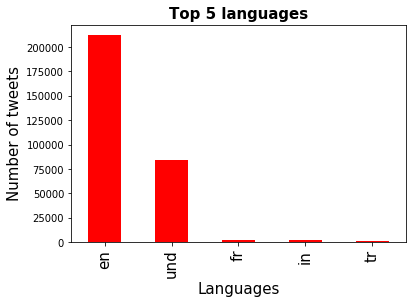

In [55]:
tweets['lang'] = list(map(lambda tweet: tweet['lang'], temp))
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

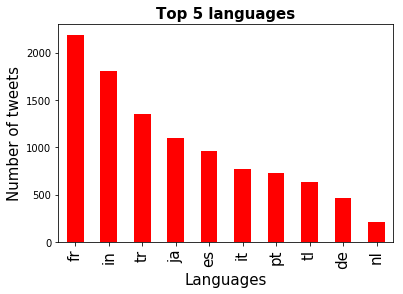

In [57]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[2:12].plot(ax=ax, kind='bar', color='red')

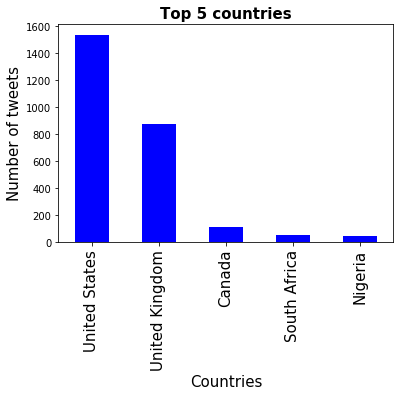

In [58]:
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, temp))
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

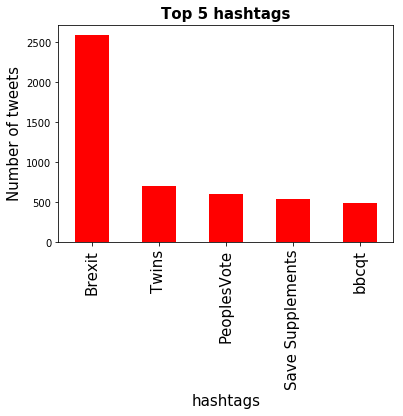

In [60]:
tweets['hashtags'] = list(map(lambda tweet: ' '.join([i['text'] for i in tweet['entities']['hashtags']]), temp))
tweets_by_lang = tweets['hashtags'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('hashtags', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 hashtags', fontsize=15, fontweight='bold')
tweets_by_lang[1:6].plot(ax=ax, kind='bar', color='red')

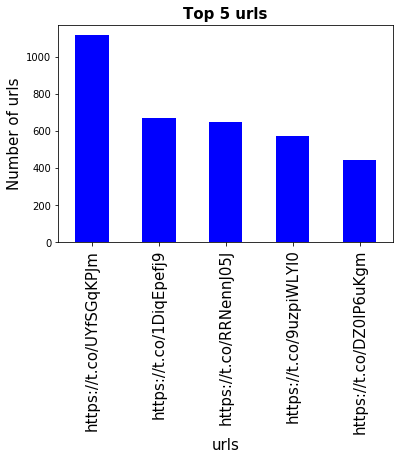

In [67]:
tweets['urls'] = list(map(lambda tweet: ' '.join([i['url'] for i in tweet['entities']['urls']]), temp))
tweets_by_lang = tweets['urls'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('urls', fontsize=15)
ax.set_ylabel('Number of urls' , fontsize=15)
ax.set_title('Top 5 urls', fontsize=15, fontweight='bold')
tweets_by_lang[1:6].plot(ax=ax, kind='bar', color='blue')

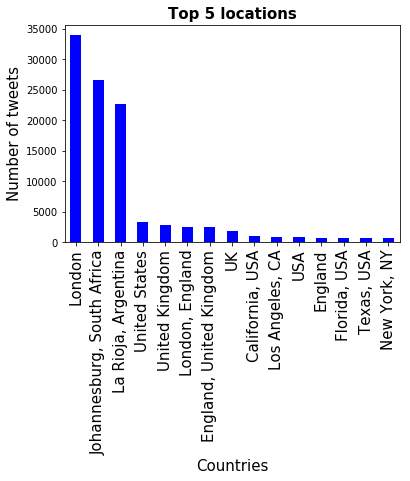

In [70]:
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], temp))
tweets_by_loc = tweets['location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 locations', fontsize=15, fontweight='bold')
tweets_by_loc[:15].plot(ax=ax, kind='bar', color='blue')

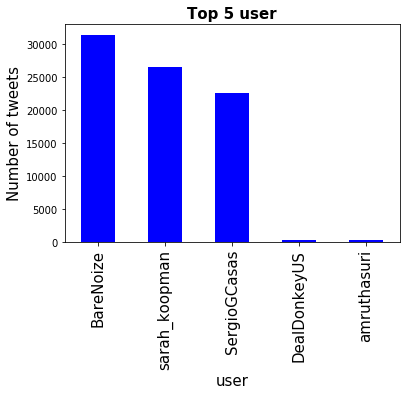

In [72]:
tweets['user'] = list(map(lambda tweet: tweet['user']['screen_name'], temp))
tweets_by_loc = tweets['user'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('user', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 user', fontsize=15, fontweight='bold')
tweets_by_loc[:5].plot(ax=ax, kind='bar', color='blue')